In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
#Read the data
toyota = pd.read_csv("D:/Data Science/Assignments/multi linear regression/ToyotaCorolla.csv",encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
corolla = pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]], axis = 1)

In [5]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
#check for missing values
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Correlation Matrix

In [9]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [10]:
car = corolla.rename({'Price': 'price', 'Age_08_04': 'age', 'KM': 'km', 'HP': 'hp', 'cc': 'cc', 'Doors': 'doors', 'Gears': 'gears', 'Quarterly_Tax': 'Qtax', 'Weight': 'Wt'}, axis = 1)

In [11]:
car.head()

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Scatterplot between variables along with histograms

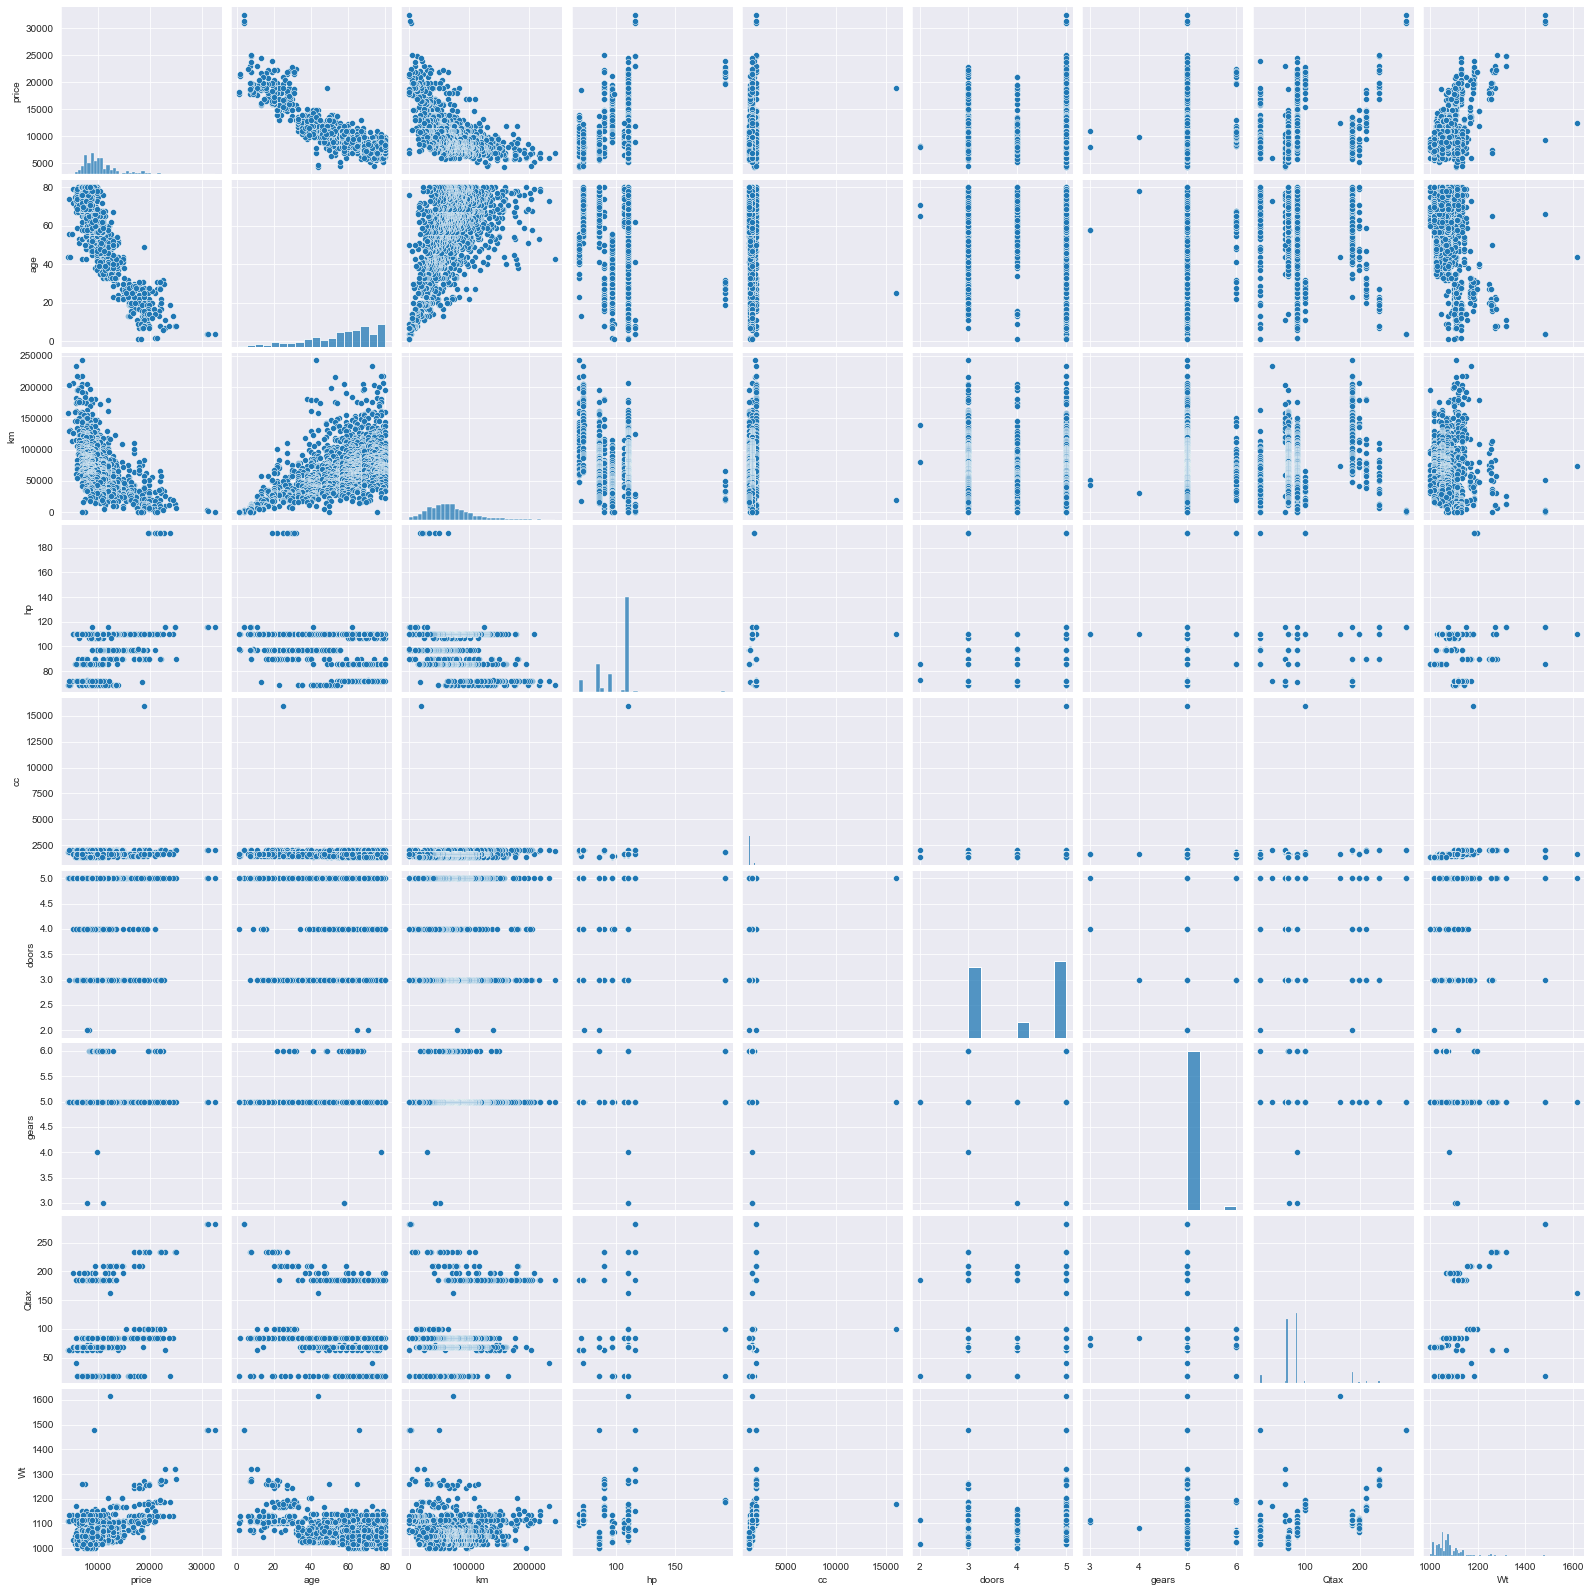

In [12]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(car)

# Preparing The Model

In [13]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('price~age+km+hp+cc+doors+gears+Qtax+Wt',data=car).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:23   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears        594.3199    197.055      3.016      0.003     207.771     980.869
Qtax           3.9491      1.310      3.015      0.003       1.379       6.519
Wt            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Coefficients
model.params

Intercept   -5573.106358
age          -121.658402
km             -0.020817
hp             31.680906
cc             -0.121100
doors          -1.616641
gears         594.319936
Qtax            3.949081
Wt             16.958632
dtype: float64

In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
age         -46.511852
km          -16.621622
hp           11.241018
cc           -1.344222
doors        -0.040410
gears         3.016007
Qtax          3.014535
Wt           15.879803
dtype: float64 
 Intercept     8.241949e-05
age          3.354724e-288
km            7.538439e-57
hp            3.757218e-28
cc            1.790902e-01
doors         9.677716e-01
gears         2.606549e-03
Qtax          2.619148e-03
Wt            2.048576e-52
dtype: float64


In [17]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regression Models

In [18]:
page=smf.ols('price~age',data = car).fit()  

In [19]:
page.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:23   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pkm=smf.ols('price~km',data = car).fit()  

In [21]:
pkm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.76e-124
Time:                        14:32:23   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
km            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
php=smf.ols('price~hp',data = car).fit()  

In [23]:
php.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.93e-34
Time:                        14:32:23   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
hp            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pcc=smf.ols('price~cc',data = car).fit()  

In [25]:
pcc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.55e-06
Time:                        14:32:23   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
pdoors=smf.ols('price~doors',data = car).fit()  

In [27]:
pdoors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.46e-12
Time:                        14:32:23   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pgear=smf.ols('price~gears',data = car).fit()  

In [29]:
pgear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Mon, 11 Apr 2022   Prob (F-statistic):             0.0168
Time:                        14:32:23   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pqtax=smf.ols('price~Qtax',data = car).fit()  

In [31]:
pqtax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           4.41e-17
Time:                        14:32:24   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9046.7382    218.889     41.330      0.000    8617.362    9476.115
Qtax          19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pwt=smf.ols('price~Wt',data = car).fit()  

In [33]:
pwt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.63e-130
Time:                        14:32:24   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Wt            40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
pagekm=smf.ols('price~age+km',data = car).fit()  

In [35]:
pagekm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
km            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
pall=smf.ols('price~age+km+hp+cc',data = car).fit()  

In [37]:
pall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1561.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:                -12601.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1431   BIC:                         2.524e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.575e+04    376.629     41.805      0.000     1.5e+04    1.65e+04
age         -152.3291      2.622    -58.105      0.000    -157.472    -147.186
km            -0.0128      0.001     -9.345      0.000      -0.015      -0.010
hp            35.4729      2.941     12.061      0.000      29.704      41.242
cc             0.4963      0.100      4.967      0.000       0.300       0.692
==============================================================================
Omnibus:                      399.614   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.899
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       9.573   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
palw=smf.ols('price~age+km+hp+cc+Wt',data = car).fit() 

In [39]:
palw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1785.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:                -12385.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4154.8553    946.732     -4.389      0.000   -6011.988   -2297.723
age         -122.4166      2.623    -46.664      0.000    -127.563    -117.271
km            -0.0195      0.001    -16.075      0.000      -0.022      -0.017
hp            30.3340      2.542     11.931      0.000      25.347      35.321
cc            -0.0889      0.090     -0.989      0.323      -0.265       0.087
Wt            18.7732      0.839     22.373      0.000      17.127      20.419
==============================================================================
Omnibus:                      203.603   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1580.991
Skew:                          -0.403   Prob(JB):                         0.00
Kurtosis:                       8.077   Cond. No.                     2.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [40]:
rsq_age = smf.ols('age~km+hp+cc+Wt',data=car).fit().rsquared  
vif_age = 1/(1-rsq_age) 
rsq_age

0.466298679785049

In [41]:
vif_age

1.8737071881277056

In [42]:
rsq_km = smf.ols('km~age+hp+cc+Wt',data=car).fit().rsquared  
vif_km = 1/(1-rsq_km) 
rsq_km

0.38744617954051863

In [43]:
vif_km

1.63250961237968

In [44]:
rsq_hp = smf.ols('hp~km+age+cc+Wt',data=car).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 
rsq_hp

0.12413403758346941

In [45]:
vif_hp

1.141727208168909

In [46]:
rsq_cc = smf.ols('cc~km+age+hp+Wt',data=car).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 
rsq_cc

0.1273707222242072

In [47]:
vif_cc

1.1459620086881075

In [48]:
rsq_Wt = smf.ols('Wt~km+age+hp+cc',data=car).fit().rsquared  
vif_Wt = 1/(1-rsq_Wt) 
rsq_Wt

0.348749099657944

In [49]:
vif_Wt

1.5355065144244264

In [50]:
rsq_price = smf.ols('price~km+age+hp+cc+Wt',data=car).fit().rsquared  
vif_price = 1/(1-rsq_price) 
rsq_price

0.861870305617451

In [51]:
vif_price

7.239572956923432

In [52]:
rsq_price1 = smf.ols('price~age+Wt',data=car).fit().rsquared  
vif_price1 = 1/(1-rsq_price1) 
rsq_price1

0.8050715736932419

In [53]:
vif_price1

5.13008809924061

In [54]:
rsq_door = smf.ols('price~doors',data=car).fit().rsquared  
vif_door = 1/(1-rsq_door) 
rsq_door

0.03434555943109785

In [55]:
vif_door

1.035567132493963

In [56]:
# Storing vif values in a data frame
datset = {'Variables':['age','km','hp','cc', 'Wt', 'price'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_Wt,vif_price]}
Vif_frame = pd.DataFrame(datset)  
Vif_frame

,Variables,VIF
0,age,1.873707
1,km,1.632510
2,hp,1.141727
3,cc,1.145962
4,Wt,1.535507
5,price,7.239573


In [57]:
pagewt=smf.ols('price~age+Wt',data = car).fit()  

In [58]:
pagewt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3149.7074   1052.897      2.991      0.003    1084.324    5215.091
age         -151.0391      2.577    -58.610      0.000    -156.094    -145.984
Wt            14.9482      0.911     16.417      0.000      13.162      16.734
==============================================================================
Omnibus:                      150.983   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.444
Skew:                          -0.249   Prob(JB):                    6.77e-207
Kurtosis:                       6.952   Cond. No.                     2.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

C:\Users\parth\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


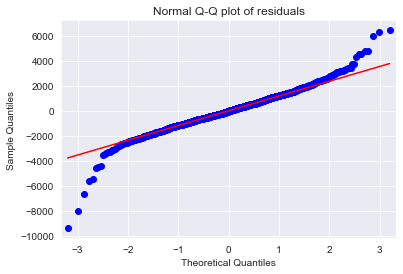

In [59]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [60]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [61]:
list(np.where(model.resid<-5000))

[array([191, 192, 221, 601, 960], dtype=int64)]

# Residual Plot for Homoscedasticity

In [62]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

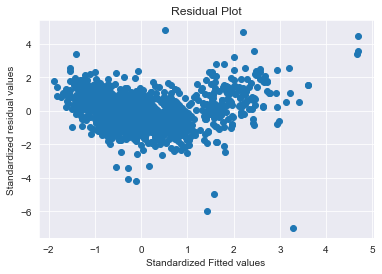

In [63]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

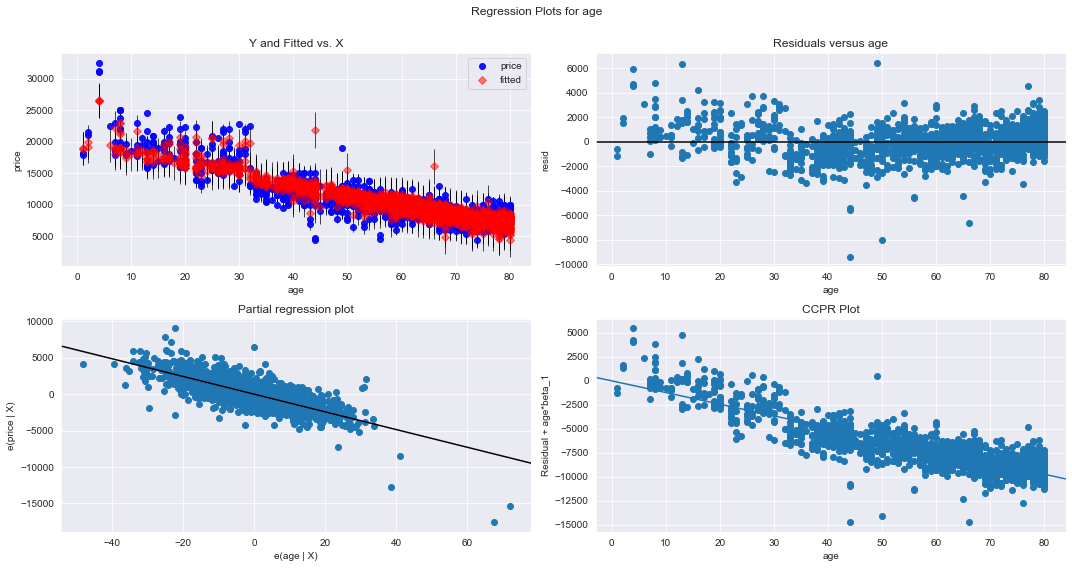

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

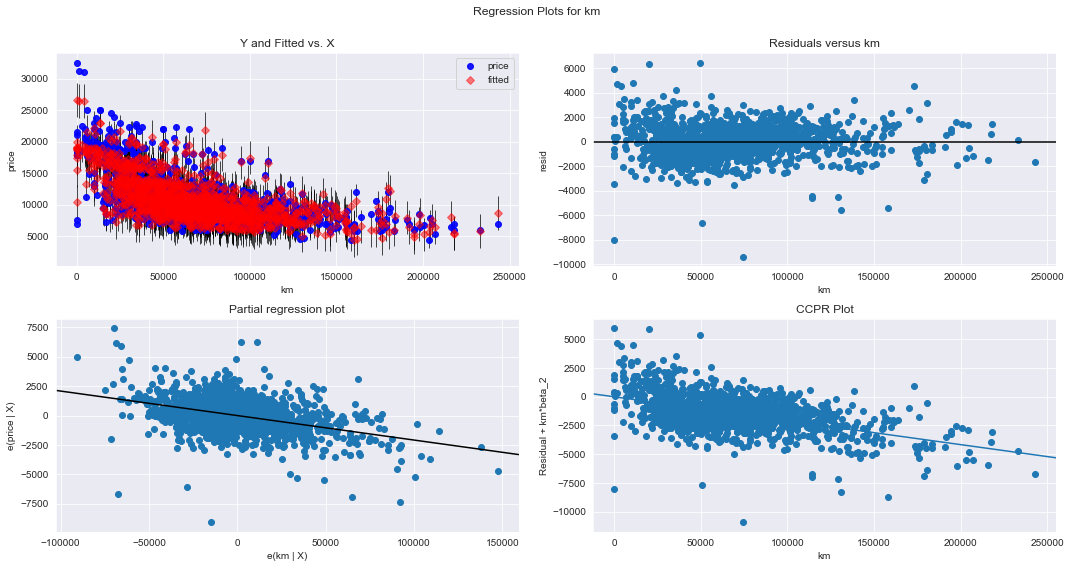

In [65]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "km", fig=fig)
plt.show()

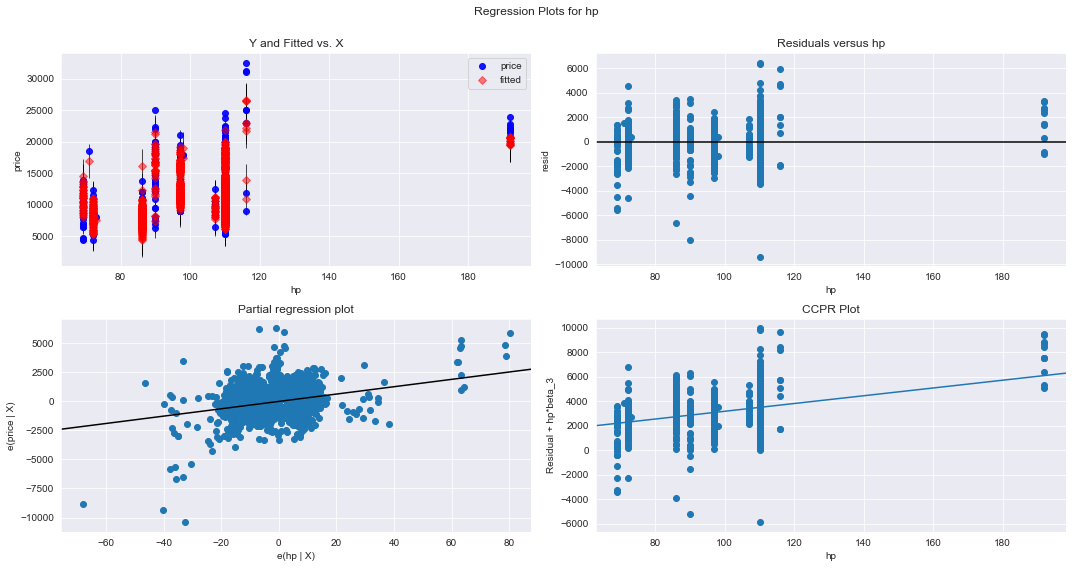

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "hp", fig=fig)
plt.show()

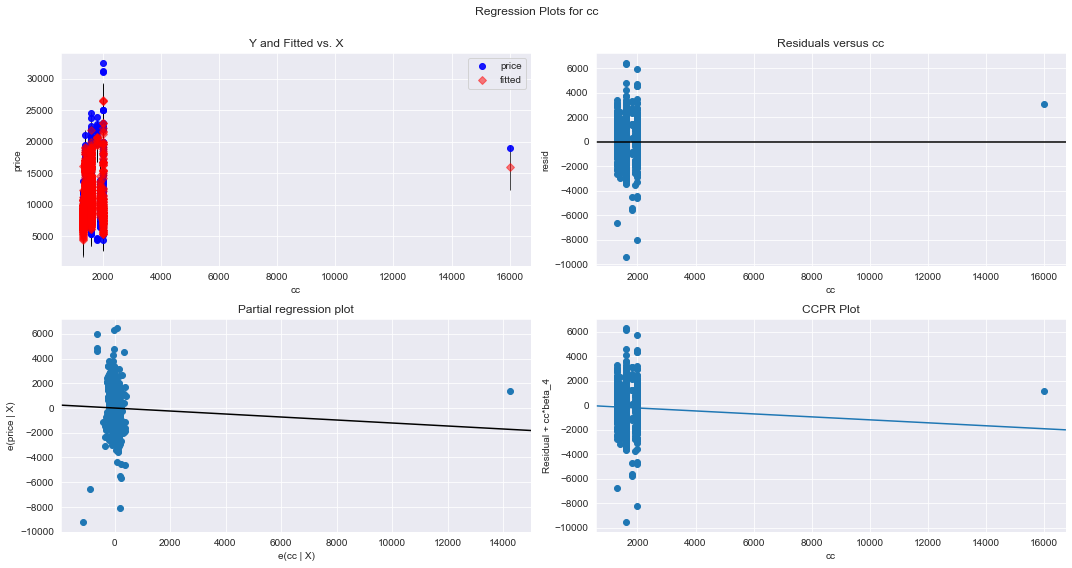

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

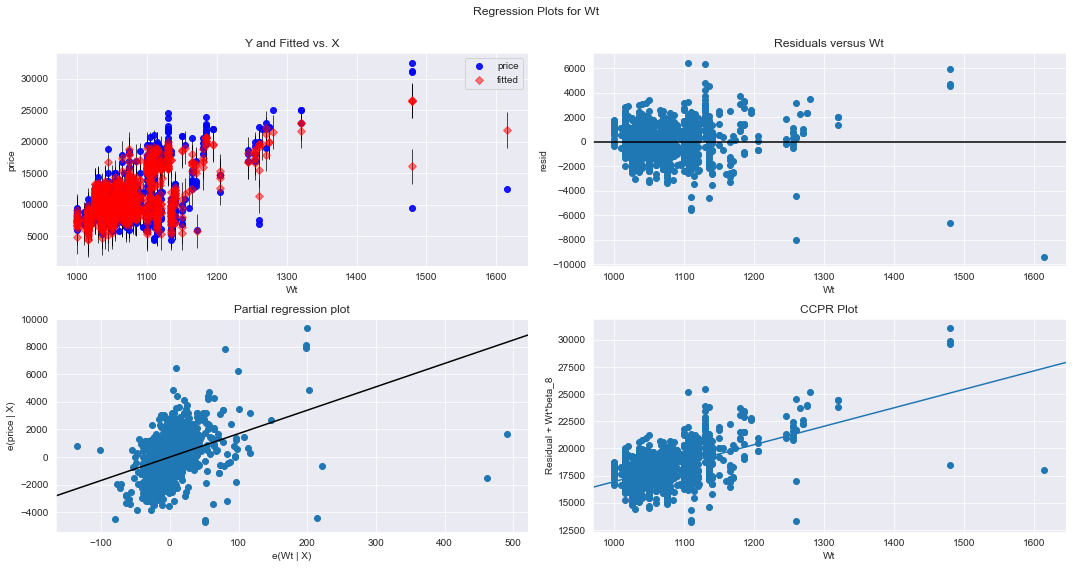

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Wt", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers or Outliers

# Cook's Distance

In [69]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

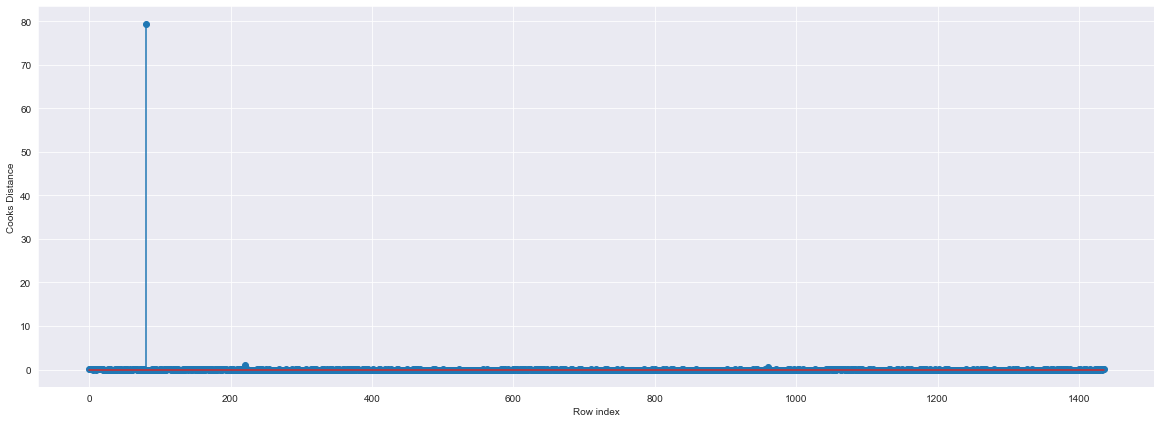

In [70]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138181)

# High Influence Points

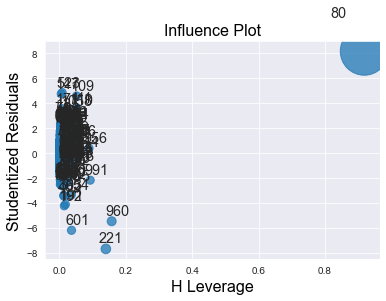

In [72]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [73]:
# From the above plot it is identified that 80 is the influencers/outliers
car.shape

(1436, 9)

In [74]:
k = car.shape[1]  # number of columns
n = car.shape[0]  # number of rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [75]:
# viewing the outliers/influencers 
car[car.index.isin([80])]

,price,age,km,hp,cc,doors,gears,Qtax,Wt
80,18950,25,20019,110,16000,5,5,100,1180


In [76]:
# comparing the above influencers with the other data present
car.head()

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [77]:
# when compared we can oberve the price is affected when the cc is susbstancially higher compared to other data present

In [78]:
car1=car.copy()
car1

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [79]:
car_imp=car1.drop(car1.index[[80]],axis=0).reset_index(drop=True)
car_imp

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Improving the model 

In [80]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml= smf.ols('price~km+age+hp+Wt+doors',data = car_imp).fit()

In [81]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1777.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:33   Log-Likelihood:                -12377.
No. Observations:                1435   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4060.0961    940.785     -4.316      0.000   -5905.565   -2214.628
km            -0.0196      0.001    -16.249      0.000      -0.022      -0.017
age         -122.4017      2.624    -46.651      0.000    -127.549    -117.255
hp            30.3516      2.545     11.927      0.000      25.360      35.343
Wt            18.6876      0.832     22.472      0.000      17.056      20.319
doors        -34.4790     39.360     -0.876      0.381    -111.689      42.731
==============================================================================
Omnibus:                      201.028   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.380
Skew:                          -0.393   Prob(JB):                         0.00
Kurtosis:                       8.048   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
(final_ml.rsquared,final_ml.aic)

(0.8614340013862721, 24766.01362757011)

In [83]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_mlcc= smf.ols('price~km+age+Wt',data = car_imp).fit()

In [84]:
final_mlcc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2654.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:33   Log-Likelihood:                -12445.
No. Observations:                1435   AIC:                         2.490e+04
Df Residuals:                    1431   BIC:                         2.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1849.8963    963.447     -1.920      0.055   -3739.816      40.024
km            -0.0242      0.001    -20.112      0.000      -0.027      -0.022
age         -120.2131      2.742    -43.834      0.000    -125.593    -114.833
Wt            19.5448      0.837     23.348      0.000      17.903      21.187
==============================================================================
Omnibus:                      219.655   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2186.185
Skew:                          -0.367   Prob(JB):                         0.00
Kurtosis:                       9.002   Cond. No.                     2.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
(final_mlcc.rsquared,final_mlcc.aic)

(0.8476378643633105, 24898.21438834487)

In [86]:
#include variable "doors" and generate R-Squared and AIC values
final_mldoor= smf.ols('price~km+age+Wt+doors',data = car_imp).fit()

In [87]:
final_mldoor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1989.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:33   Log-Likelihood:                -12445.
No. Observations:                1435   AIC:                         2.490e+04
Df Residuals:                    1430   BIC:                         2.493e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1860.0456    967.017     -1.923      0.055   -3756.970      36.878
km            -0.0242      0.001    -20.100      0.000      -0.027      -0.022
age         -120.2093      2.744    -43.815      0.000    -125.591    -114.827
Wt            19.5742      0.868     22.545      0.000      17.871      21.277
doors         -5.2852     41.179     -0.128      0.898     -86.062      75.492
==============================================================================
Omnibus:                      220.527   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2198.120
Skew:                          -0.370   Prob(JB):                         0.00
Kurtosis:                       9.018   Cond. No.                     2.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
(final_mldoor.rsquared,final_mldoor.aic)

(0.8476396195250995, 24900.1978575207)

Comparing above R-Square and AIC values, model 'final_ml' has high R- square and low AIC value hence include variable 'price~km+age+hp+Wt+doors' so that multi collinearity problem would be resolved.

# Cook's Distance

In [89]:
model_influence_kacwd = final_ml.get_influence()
(c_kacwd, _) = model_influence_kacwd.cooks_distance

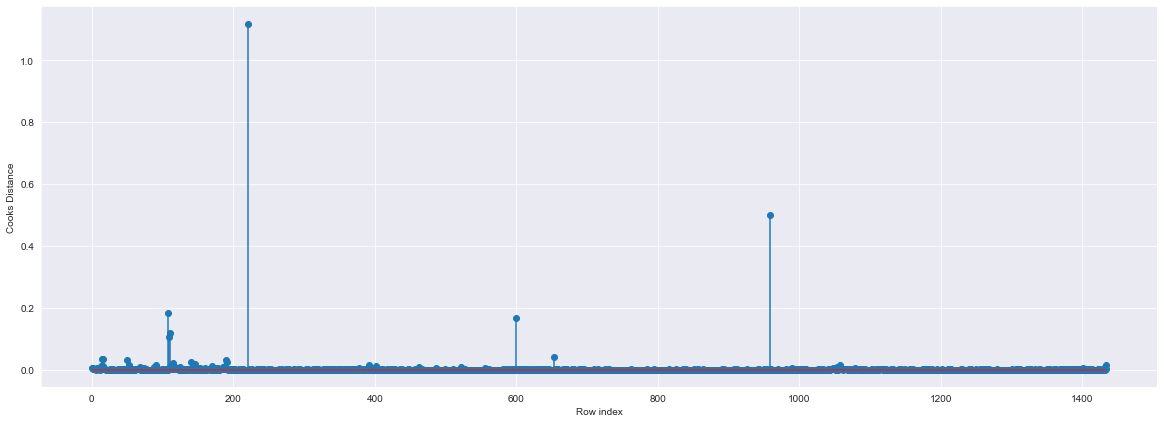

In [90]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car_imp)),np.round(c_kacwd,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [91]:
#index of the data points where c is more than 1
(np.argmax(c_kacwd),np.max(c_kacwd))

(220, 1.1184498979451856)

# High Influence Points

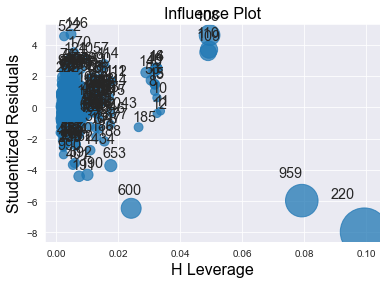

In [92]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml)
plt.show()

In [93]:
k = car_imp.shape[1]  # number of columns
n = car_imp.shape[0]  # number of rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [94]:
new_car = car_imp.copy()
new_car

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [95]:
# viewing the outliers/influencers 
car_imp[car_imp.index.isin([109,110,220,600,959])]

,price,age,km,hp,cc,doors,gears,Qtax,Wt
109,31000,4,4000,116,2000,5,5,283,1480
110,31275,4,1500,116,2000,5,5,283,1480
220,12450,44,74172,110,1600,5,5,163,1615
600,7500,50,1,90,2000,3,5,64,1260
959,9390,66,50806,86,1300,3,5,19,1480


In [96]:
new_car.shape

(1435, 9)

In [97]:
#Drop 220,959, 109, 110, and 600
f_car=new_car.drop(new_car.index[[109, 110, 220, 600, 959]],axis=0)

In [98]:
f_car

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [99]:
f_car.shape

(1430, 9)

In [100]:
tco =f_car.reset_index(drop=True)
tco

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [101]:
#Build the model on the new data
final= smf.ols('price~km+age+hp+Wt+doors',data = tco).fit()

In [102]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1936.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:36   Log-Likelihood:                -12248.
No. Observations:                1430   AIC:                         2.451e+04
Df Residuals:                    1424   BIC:                         2.454e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7934.6046   1019.554     -7.782      0.000   -9934.595   -5934.615
km            -0.0217      0.001    -18.639      0.000      -0.024      -0.019
age         -115.4101      2.570    -44.899      0.000    -120.452    -110.368
hp            28.3285      2.405     11.781      0.000      23.612      33.045
Wt            22.4787      0.922     24.367      0.000      20.669      24.288
doors        -88.6974     37.522     -2.364      0.018    -162.302     -15.093
==============================================================================
Omnibus:                       63.169   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.026
Skew:                           0.041   Prob(JB):                     6.05e-44
Kurtosis:                       4.826   Cond. No.                     2.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#Again check for influencers
model_influence = final.get_influence()
(c_new, _) = model_influence.cooks_distance

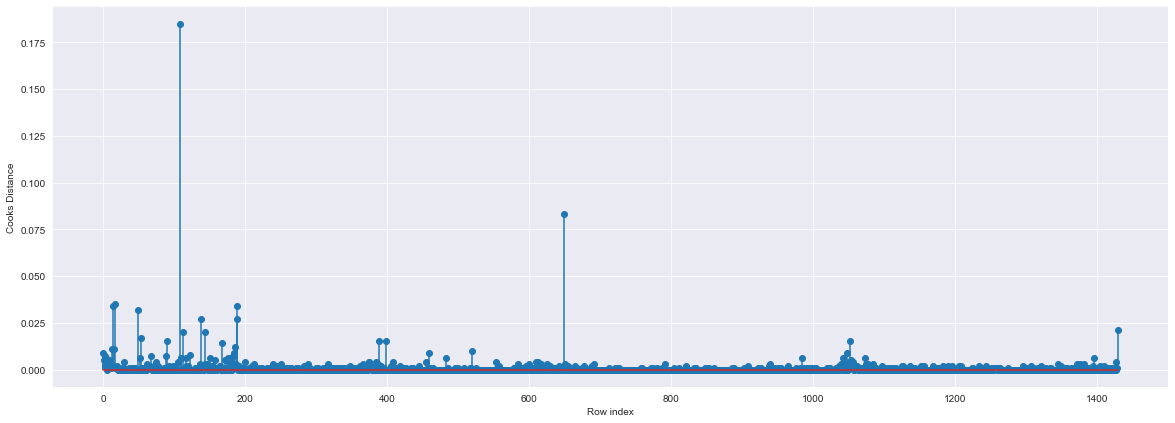

In [104]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tco)),np.round(c_new,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [105]:
#index of the data points where c is more than .1
(np.argmax(c_new),np.max(c_new))

(108, 0.18534229110828196)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [106]:
final= smf.ols('price~km+age+hp+Wt+doors',data = tco).fit()

In [107]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1936.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:36   Log-Likelihood:                -12248.
No. Observations:                1430   AIC:                         2.451e+04
Df Residuals:                    1424   BIC:                         2.454e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7934.6046   1019.554     -7.782      0.000   -9934.595   -5934.615
km            -0.0217      0.001    -18.639      0.000      -0.024      -0.019
age         -115.4101      2.570    -44.899      0.000    -120.452    -110.368
hp            28.3285      2.405     11.781      0.000      23.612      33.045
Wt            22.4787      0.922     24.367      0.000      20.669      24.288
doors        -88.6974     37.522     -2.364      0.018    -162.302     -15.093
==============================================================================
Omnibus:                       63.169   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.026
Skew:                           0.041   Prob(JB):                     6.05e-44
Kurtosis:                       4.826   Cond. No.                     2.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
(final.rsquared,final.aic)

(0.8717838469783449, 24507.654220950055)

In [109]:
tco.head()

,price,age,km,hp,cc,doors,gears,Qtax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [110]:
final.predict(tco.iloc[0:5,])

0    16862.609103
1    16299.536967
2    16861.653396
3    16494.377577
4    16351.256972
dtype: float64

In [111]:
pred_y = final.predict(tco)

In [112]:
pred_y

0       16862.609103
1       16299.536967
2       16861.653396
3       16494.377577
4       16351.256972
            ...     
1425     8867.142845
1426     8329.626832
1427     8488.084779
1428     8605.664613
1429    11008.095042
Length: 1430, dtype: float64

In [113]:
pred_y.describe()

count     1430.000000
mean     10698.530769
std       3310.111954
min       4346.996969
25%       8313.312269
50%       9925.508179
75%      12285.873513
max      27714.785971
dtype: float64

In [114]:
orig = final.predict(car)

In [115]:
orig

0       16862.609103
1       16299.536967
2       16861.653396
3       16494.377577
4       16351.256972
            ...     
1431     8867.142845
1432     8329.626832
1433     8488.084779
1434     8605.664613
1435    11008.095042
Length: 1436, dtype: float64

In [116]:
orig.describe()

count     1436.000000
mean     10746.652001
std       3398.284623
min       4346.996969
25%       8320.029038
50%       9950.541073
75%      12330.006589
max      27714.785971
dtype: float64